This notebook will cover the test scenarios and save the results. 

Will not necessarily plot the simulations

In [60]:
import importlib

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

import functions as f

importlib.reload(f)

<module 'functions' from 'c:\\uoe_repos\\ind-maths-project-2-group-8\\functions.py'>

# Model Parameters

## Constant parameters

In [61]:
# # Birds
v0 = 10      # velocity of birds (constant)
eta = 0.5      # maximum random fluctuation in angle (in radians)
R_bird = 1        # interaction radius (bird-bird)
Rsq = R_bird**2     # square of the interaction radius
N = 100    # number of birds

# # Time parameters
dt = 1      # time step
Nt = 100       # number of time steps

# # Area parameters
L = 1000       # size of box (Area of a real wind farm)

# # Obstacles
R_obs = 50# interaction radius (bird - obstacles)
fov_angle = np.pi # Field of View of birds

np.random.seed(17)      # set the random number generator seed

## Test Specific Parameters

In [62]:
# # Wind
v0_wind = 0.5 # velocity of wind (constant)
v_wind_noise = 0.1 # maximum random fluctuation in wind velocity (in same units as v0_wind)
wind_theta = np.pi/2 # wind direction 

# Obstacles
num_obstacles = 8
nrows = 4
ncols = 2

# Run Simulation and Plot

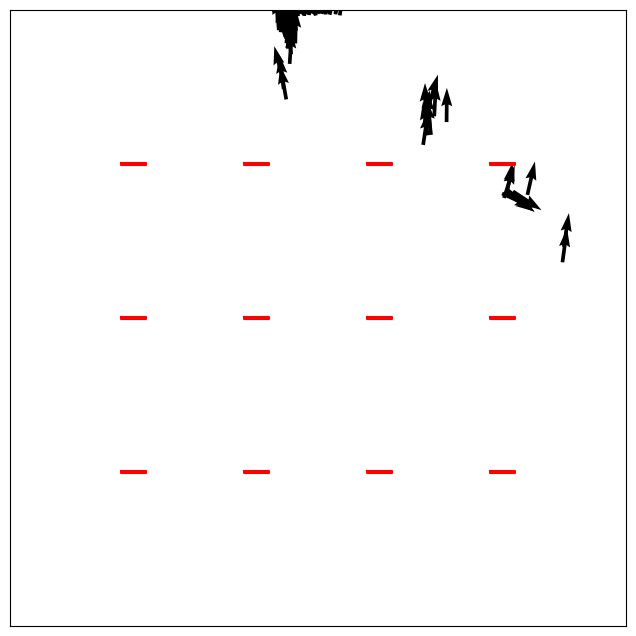

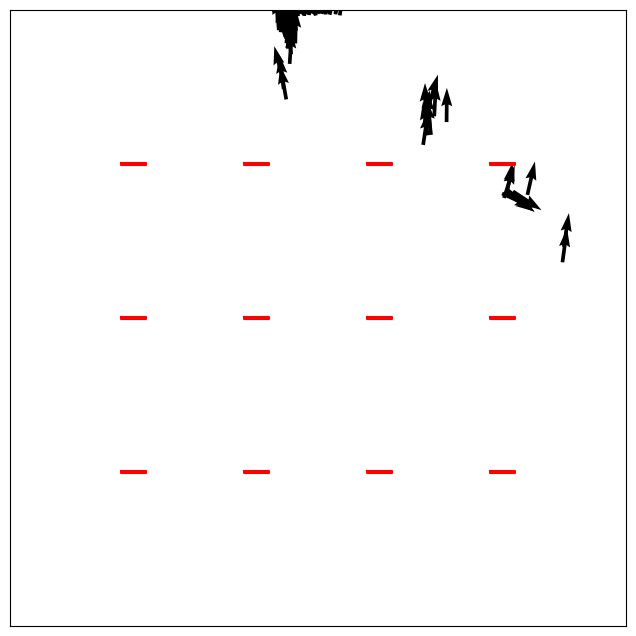

In [64]:
# Set up a figure
fig, ax = plt.subplots(figsize = (8,8))

# Get obstacles
# Number of obstacles
num_obstacles = 12
nrows = 3
ncols = 4

x_obstacle_list, y_obstacle_list, x_obstacle, y_obstacle = f.get_obstacles(L, num_obstacles, nrows, ncols)

# Plot obstacle(s) - Plot the "list" to visualise the different obstaclces properly
for xx, yy in zip(x_obstacle_list, y_obstacle_list):
    ax.plot(xx, yy, 'r-')

# # Get the initial configuration

# Random
# x, y, vx, vy, theta = initialize_birds_random(N, L, v0)

# Uniform
theta_start = np.pi/2
x, y, vx, vy, theta = f.initialize_birds_uniform(N, L, v0, theta_start, eta)

# Plot initial quivers
q = plt.quiver(x,y,vx,vy)

# Set figure parameters
ax.set(xlim=(0, L), ylim=(0, L))
ax.set_aspect('equal')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Initilise lists to plot later
vx_wind_list = []
vy_wind_list = []

clustering_coefficients = []

# Do each step, updating the quiver and plotting the new one
for i in range(Nt):
    # print(i)
    x, y, vx, vy, vx_wind, vy_wind = f.step(x, y, vx, vy, theta, Rsq, x_obstacle, y_obstacle, eta, fov_angle, N, dt, 0, 0, wind_theta=wind_theta, L=L, R_obs=R_obs, v0=v0)
    q = f.update_quiver(q, x, y, vx, vy)
    clear_output(wait=True)
    display(fig)
    
    # Append wind information
    vx_wind_list.append(vx_wind)    
    vy_wind_list.append(vy_wind)
    
    # Append clustering coefficient
    clustering_coefficients.append(f.get_clustering_coefficient(vx, vy, v0, vx_wind, vy_wind, N))